In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['font.size'] = 20

In [24]:
from profiler import profile, OutputType

### Memory vs n_conv

In [25]:
n_convs = range(1,5)
model_bytes = []
train_bytes = []
total_bytes = []
for n_conv in n_convs:
    ret = profile(n_conv=n_conv)
    model_bytes.append(ret['model']['total_peak_bytes'] / 1e6)
    train_bytes.append(ret['train']['total_peak_bytes'] / 1e6)
    total_bytes.append(ret['total']['total_peak_bytes'] / 1e6)

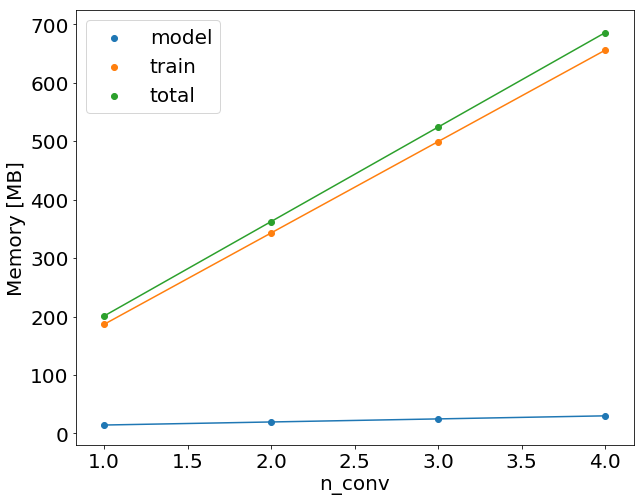

In [26]:
plt.scatter(n_convs, model_bytes, label='model')
plt.plot(n_convs, model_bytes)
plt.scatter(n_convs, train_bytes, label='train')
plt.plot(n_convs, train_bytes)
plt.scatter(n_convs, total_bytes, label='total')
plt.plot(n_convs, total_bytes)
plt.legend()
plt.ylabel('Memory [MB]')
_ = plt.xlabel('n_conv')

### Memory vs filters

In [27]:
filters = [2, 4, 16, 32, 64]
model_bytes = []
train_bytes = []
total_bytes = []
for f in filters:
    ret = profile(filters=f)
    model_bytes.append(ret['model']['total_peak_bytes'] / 1e6)
    train_bytes.append(ret['train']['total_peak_bytes'] / 1e6)
    total_bytes.append(ret['total']['total_peak_bytes'] / 1e6)

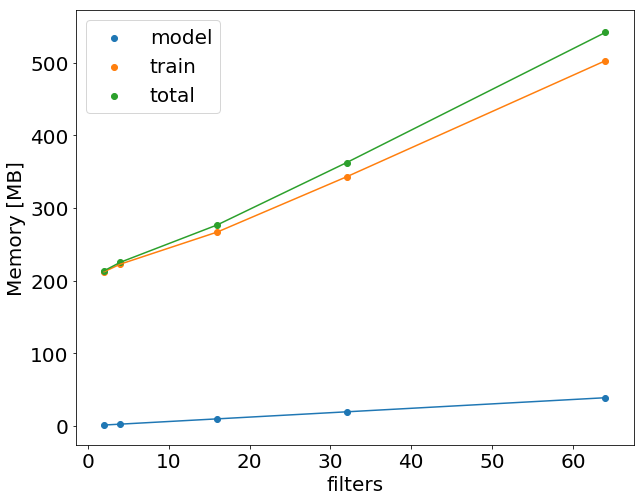

In [28]:
plt.scatter(filters, model_bytes, label='model')
plt.plot(filters, model_bytes)
plt.scatter(filters, train_bytes, label='train')
plt.plot(filters, train_bytes)
plt.scatter(filters, total_bytes, label='total')
plt.plot(filters, total_bytes)
plt.legend()
plt.ylabel('Memory [MB]')
_ = plt.xlabel('filters')

### Memory vs batch_size

In [30]:
batch_sizes = [1, 2, 4, 8, 16, 32]
model_bytes = []
train_bytes = []
total_bytes = []
for batch_size in batch_sizes:
    ret = profile(batch_size=batch_size)
    model_bytes.append(ret['model']['total_peak_bytes'] / 1e6)
    train_bytes.append(ret['train']['total_peak_bytes'] / 1e6)
    total_bytes.append(ret['total']['total_peak_bytes'] / 1e6)

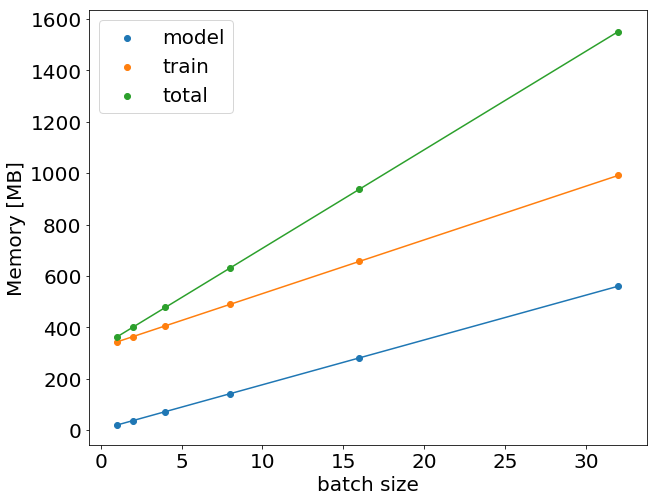

In [31]:
x = batch_sizes
plt.scatter(x, model_bytes, label='model')
plt.plot(x, model_bytes)
plt.scatter(x, train_bytes, label='train')
plt.plot(x, train_bytes)
plt.scatter(x, total_bytes, label='total')
plt.plot(x, total_bytes)
plt.legend()
plt.ylabel('Memory [MB]')
_ = plt.xlabel('batch size')

### Memory vs batch_size (drop, bn, drop+bn)

In [35]:
filters = [2, 4, 16, 32, 64]
base_bytes = []
drop_bytes = []
bn_bytes = []
drop_bn_bytes = []
for f in filters:
    ret = profile(filters=f)
    base_bytes.append(ret['total']['total_peak_bytes'] / 1e6)
    ret = profile(filters=f, dropout=0.5)
    drop_bytes.append(ret['total']['total_peak_bytes'] / 1e6)
    ret = profile(filters=f, batch_norm=True)
    bn_bytes.append(ret['total']['total_peak_bytes'] / 1e6)
    ret = profile(filters=f, batch_norm=True, dropout=0.5)
    drop_bn_bytes.append(ret['total']['total_peak_bytes'] / 1e6)

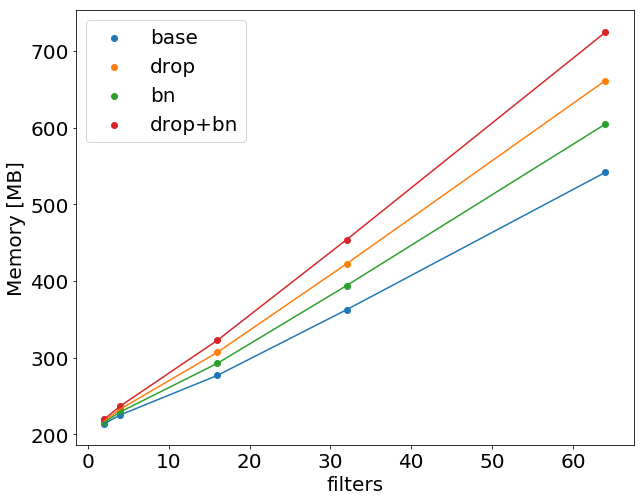

In [37]:
x = filters
plt.scatter(x, base_bytes, label='base')
plt.plot(x, base_bytes)
plt.scatter(x, drop_bytes, label='drop')
plt.plot(x, drop_bytes)
plt.scatter(x, bn_bytes, label='bn')
plt.plot(x, bn_bytes)
plt.scatter(x, drop_bn_bytes, label='drop+bn')
plt.plot(x, drop_bn_bytes)
plt.legend()
plt.ylabel('Memory [MB]')
_ = plt.xlabel('filters')

### Most memory expensive operation

In [29]:
profile(output_type=OutputType.FILE)

{'model': {'total_parameters': 100994, 'total_peak_bytes': 19529772},
 'total': {'total_parameters': 302984, 'total_peak_bytes': 362556406},
 'train': {'total_parameters': 201990, 'total_peak_bytes': 343026634}}